In [57]:
# Import libraries

# For dealing with data set
import numpy as np
import pandas as pd
import collections

# For plotting
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# For iterations
import itertools

# For normalization
from sklearn.preprocessing import StandardScaler

# To handle class inbalanced data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# For predictions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [58]:
# Importing the CSV file

path = 'creditcard.csv'

In [59]:
# Read and store content of a CSV file

df = pd.read_csv(path)

In [60]:
# Observe the data table

df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
# Identify the spread of the data set

rows = df.shape[0]
columns = df.shape[1]
print('Size of data set:', rows, 'entries' '\n' 'Number of features:', columns)

Size of data set: 284807 entries
Number of features: 31


In [62]:
# Inspect the data types of each column

df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [63]:
# Identify number of rows with null values under each column

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [64]:
# Check for data duplications

duplicate = df[df.duplicated(keep = 'last')]

print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282986,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283482,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283484,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [65]:
# Drop the duplicated raws

df = df.drop_duplicates( keep='last')

# Identify the updated spread of data

rows = df.shape[0]
columns = df.shape[1]
print('Size of data set:', rows, 'entries' '\n' 'Number of features:', columns)

Size of data set: 283726 entries
Number of features: 31


In [66]:
# Converting class feature into boolean values
# This step ios not necessary

df.Class = df.Class.replace({1: True, 0: False})
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False


In [67]:
# Inisghts from the data set

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [68]:
# Check for  fraud transations count

no = len(df[df.Class == False])
yes = len(df[df.Class == True])
yes_per = (yes / (yes + no)) * 100

print("Fraudualant transactions: ", yes)
print("Genuine transactions: ", no)
print("Percentage of Fraudualant transactions: {:.4f}".format(yes_per))

Fraudualant transactions:  473
Genuine transactions:  283253
Percentage of Fraudualant transactions: 0.1667


In [69]:
# Visualization of the count of fraud and genuine transations
# False stands for genuine transations and true is for fraud

df2 = df.groupby(["Class"]).count().reset_index()

fig = px.bar(df2,
             y=df.groupby(["Class"]).size(),labels={'true': "hello", 'false': "hi"},
             x="Class",
             color='Class',)

fig.update_layout(
    title="Spread of credit card frauds",
    xaxis_title="Class",
    yaxis_title="Transactions",
    legend_title="Classified as a fraud",
    font=dict(
        family="Arial",
        size=12,
        color="Black"),

)
fig.show()

In [70]:
# Normalizing data

scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))

In [75]:
# Drop unwanted columns
df.drop(["Amount", "Time"], inplace= True, axis= 1)

In [76]:
# Fetching the target feature

Y = df["Class"]

# Fetching the independent features

X = df.drop(["Class"], axis= 1)

In [77]:
# Treatment for class imbalance nature
# Performing oversampling

X_balance, Y_balance = SMOTE().fit_resample(X, Y)
print("Shape of X: ", X_balance.shape)
print("Shape of Y: ", Y_balance.shape)

value_counts = collections.Counter(Y_balance)
print(value_counts)

Shape of X:  (566506, 29)
Shape of Y:  (566506,)
Counter({False: 283253, True: 283253})


In [78]:
# Split the data to create test and training set

(X_train, X_test, Y_train, Y_test) = train_test_split(X_balance, Y_balance, test_size= 1/3, random_state= 42)

print("Shape of training set: ", X_train.shape)
print("Shape of testing set: ", X_test.shape)

Shape of training set:  (377670, 29)
Shape of testing set:  (188836, 29)


In [79]:
# Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

predictions = dt.predict(X_test)
score = dt.score(X_test, Y_test) * 100

In [80]:
# Print scores of the classifiers

print("Decision Tree Score: ", score)

Decision Tree Score:  99.77705522252113


In [81]:
# To plot the confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [82]:
# Confusion matrix for Decision Trees

matrix = confusion_matrix(Y_test, predictions.round())
print("Confusion Matrix for Decision Tree")
print(matrix)

Confusion Matrix for Decision Tree
[[94116   296]
 [  125 94299]]


Confusion matrix, without normalization


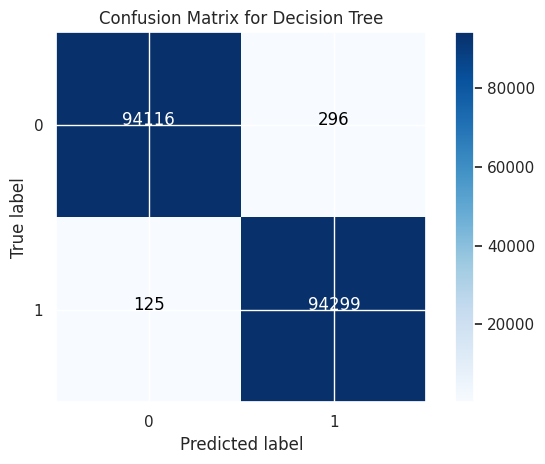

In [83]:
plot_confusion_matrix(matrix, classes=[0, 1], title= "Confusion Matrix for Decision Tree")

In [84]:
# Evaluation of the model

print("Accuracy: {:.5f}".format(accuracy_score(Y_test, predictions)))
print("Precision: {:.5f}".format(precision_score(Y_test, predictions)))
print("Recall: {:.5f}".format(recall_score(Y_test, predictions)))
print("F1-score: {:.5f}".format(f1_score(Y_test, predictions)))

Accuracy: 0.99777
Precision: 0.99687
Recall: 0.99868
F1-score: 0.99777
